# Linear Rgeression Assignment

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset

bike_df = pd.read_csv(r"C:\Users\797846\OneDrive - Cognizant\Desktop\Upgrad PG\Linear Regression\Multiple linear regression\day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Getting Column names and size

print(bike_df.shape)
print(bike_df.columns)

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [4]:
# Checking for null values

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

`Inference` No null values are present. So, we are good to proceed with the data furthur.

In [5]:
# Getting summary of dataset
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking dtypes using info()

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Checking if Linear model can be applied to the data set

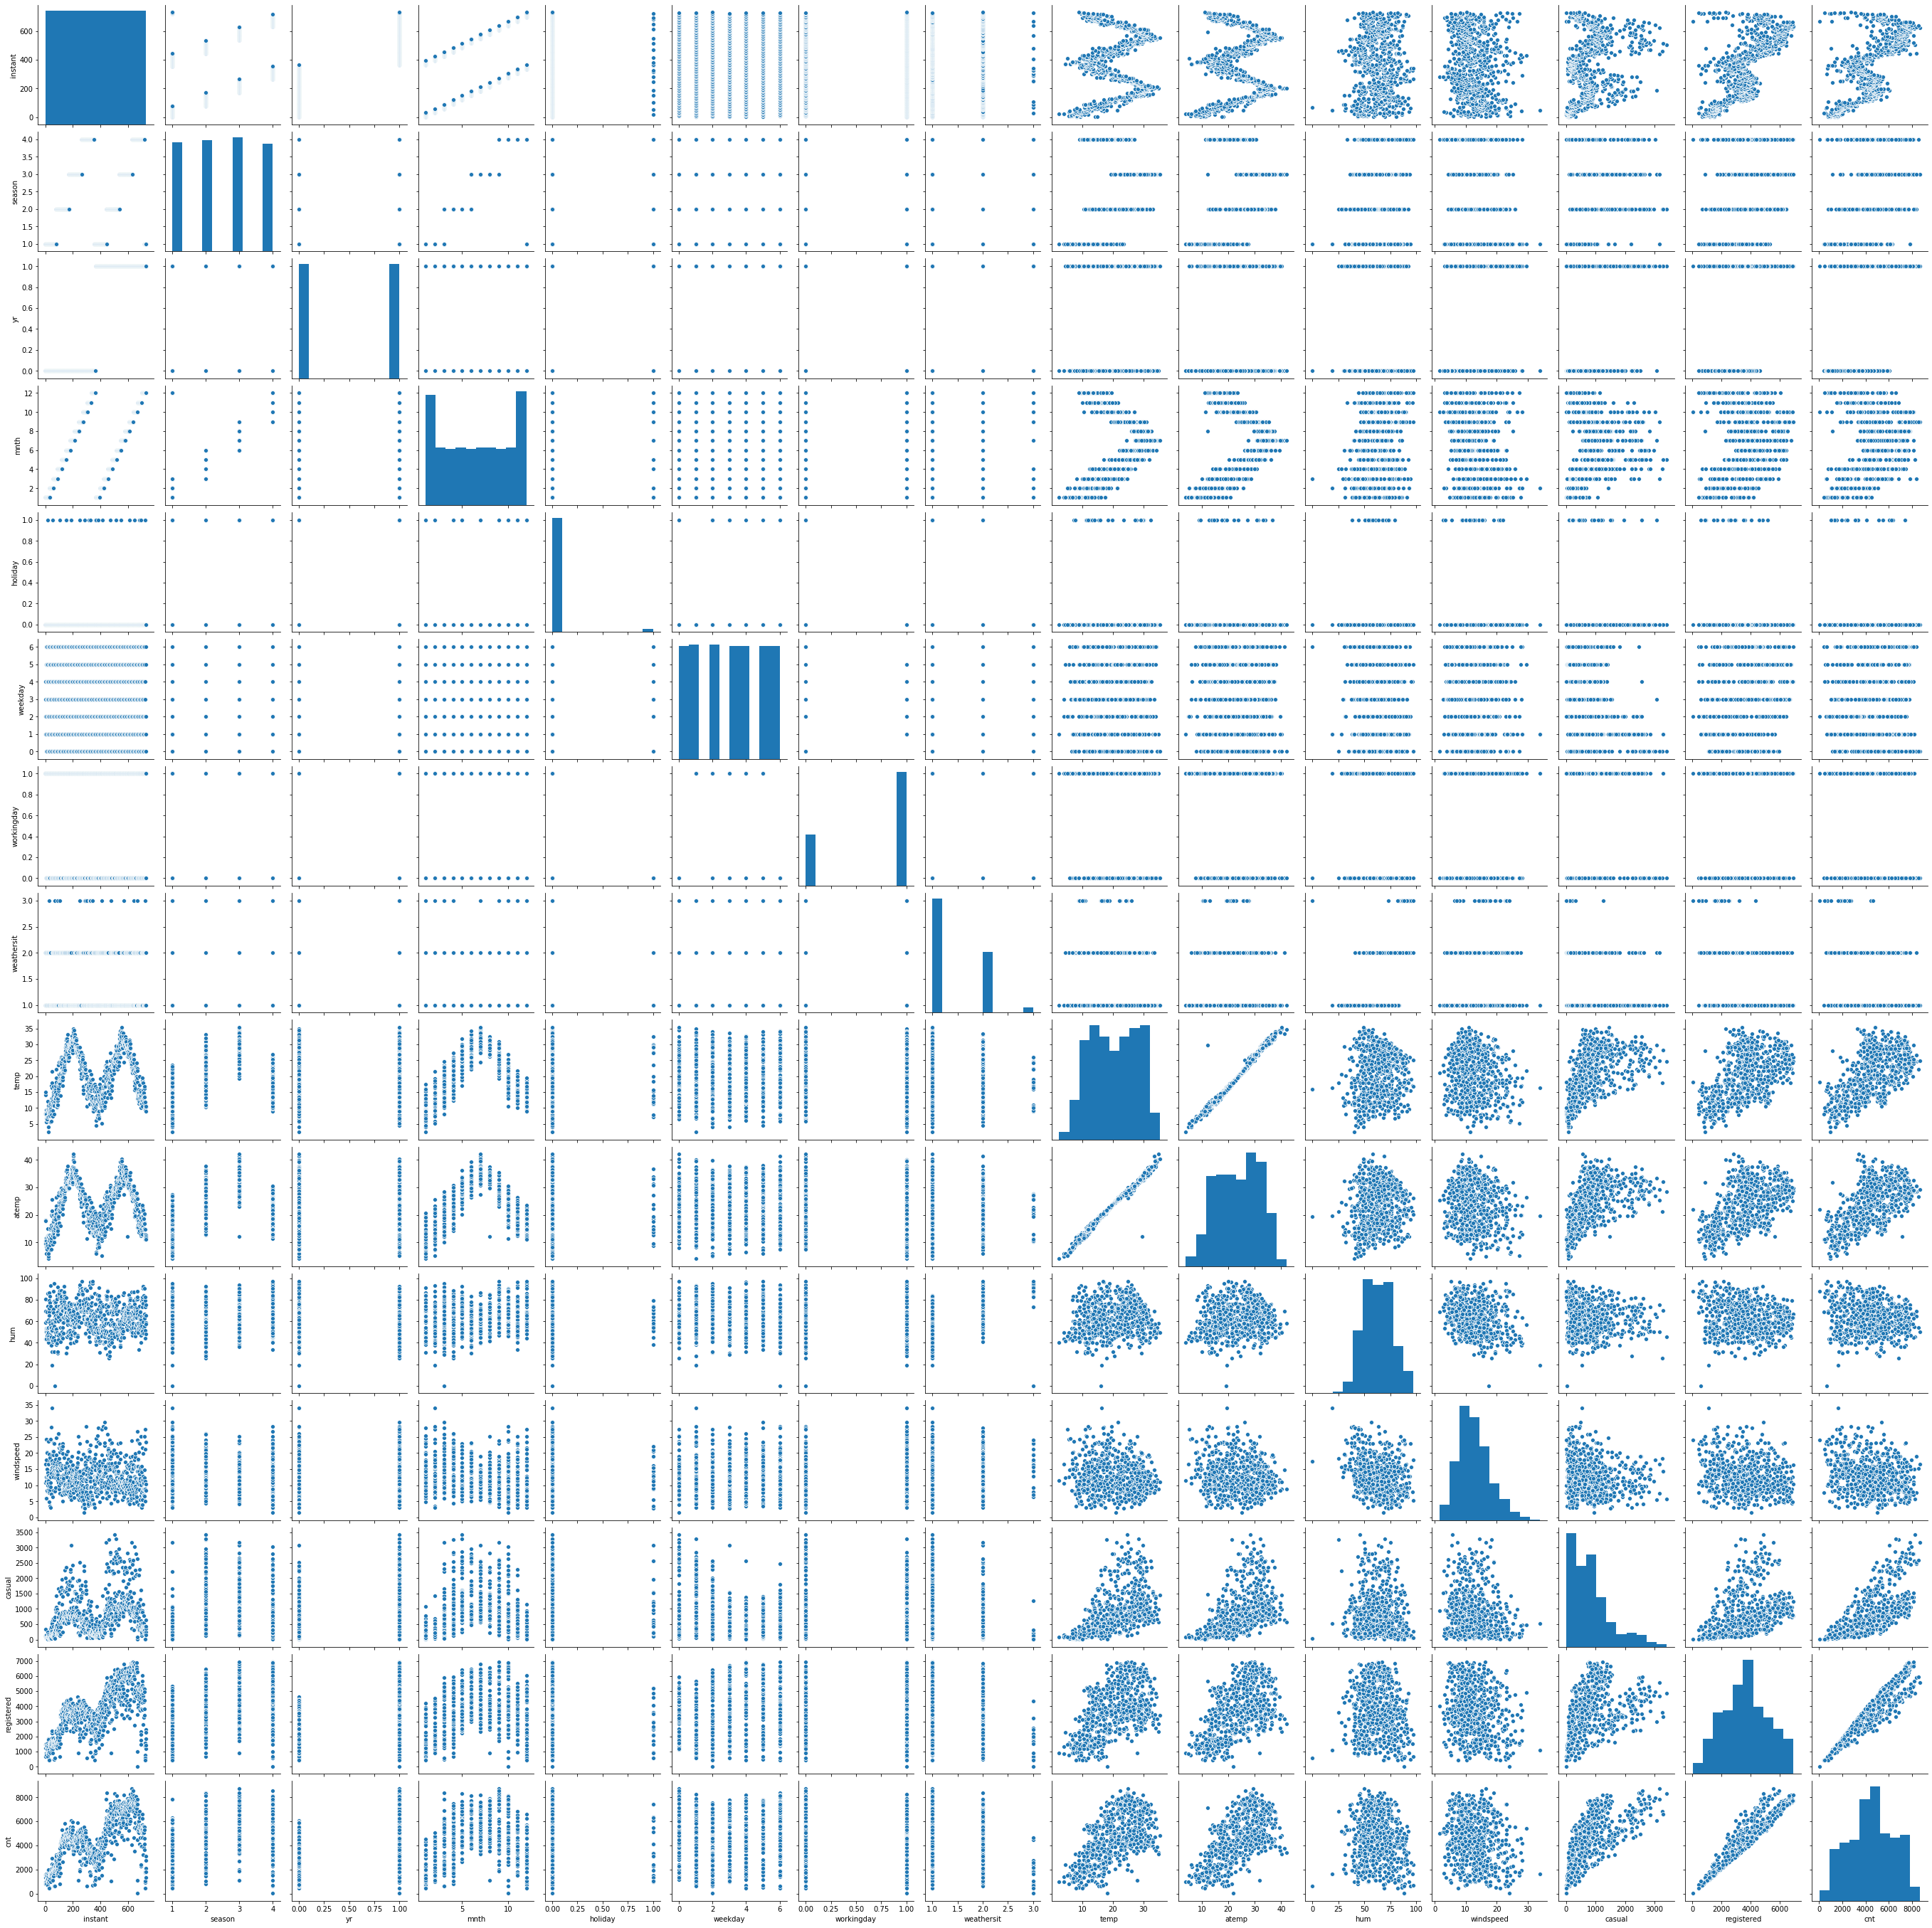

In [7]:
# IF the data set has a linear correlation with the target variable then we can say linear model can be applied with the dataset

sns.pairplot(bike_df)

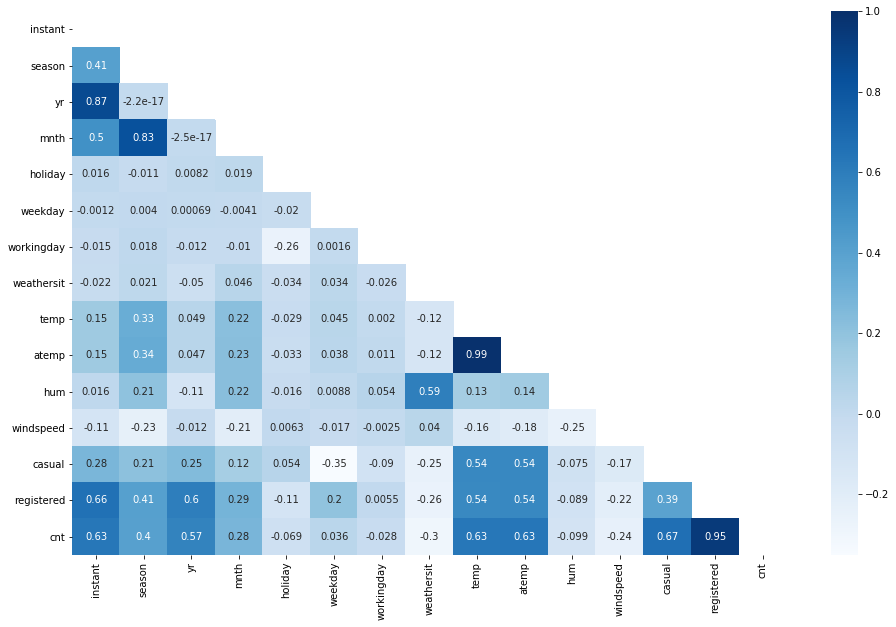

In [7]:
plt.figure(figsize = (16, 10))
mask = np.triu(bike_df.corr())
sns.heatmap(bike_df.corr(), cmap = 'Blues', annot = True, mask = mask)
plt.show()

`Inference` : It is obvious from pairplot and Heatmap that there are variables with linear correlation. So, we can proceed with Linear Regression model

## Preparation of Data

### For building  a good linear model, we have to remove and derive features with the given data set. Here, below 2 features can be dropped

   - instance
   - dteday
   - registered and casual : Since these variables show only the count of customers booked under respective categories

In [7]:
model_df = bike_df.drop(columns= ['instant', 'dteday', 'casual', 'registered'])

In [8]:
model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Checking for Outliers in Numerical variables

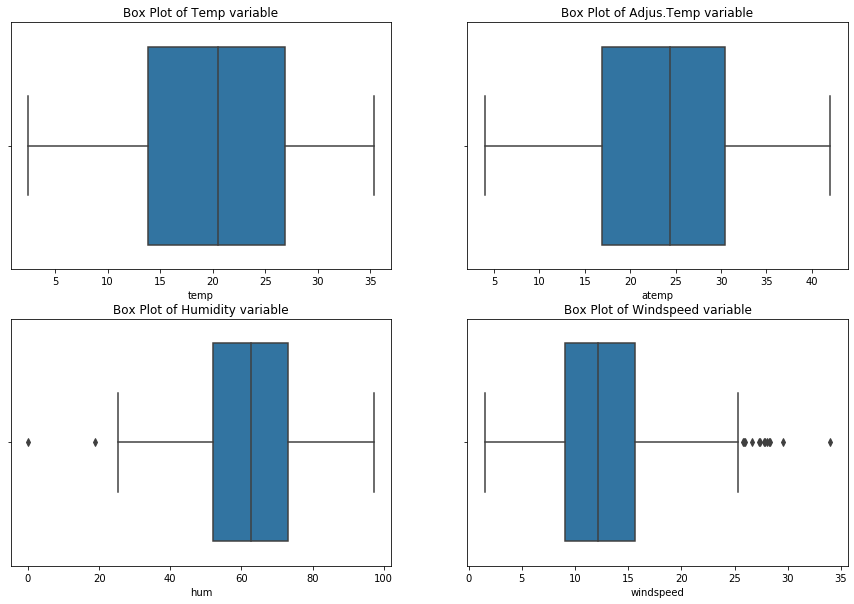

In [70]:
num_variables = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(model_df.temp)
plt.title('Box Plot of Temp variable')
plt.subplot(2,2,2)
sns.boxplot(model_df.atemp)
plt.title('Box Plot of Adjus.Temp variable')
plt.subplot(2,2,3)
sns.boxplot(model_df.hum)
plt.title('Box Plot of Humidity variable')
plt.subplot(2,2,4)
sns.boxplot(model_df.windspeed)
plt.title('Box Plot of Windspeed variable')
plt.show()

`Inference` : It is seen here that humidity value for a day tends to be 0 which is impossible. Checking the count of rows having humidity value 0

In [62]:
model_df[model_df.hum == 0.0]

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
68,0,0,0,15.952731,19.2834,0.0,17.545759,623,1,0,...,0,0,0,1,0,0,0,0,1,0


In [122]:
# Changing humidity value from 0 to mean value

model_df.hum = model_df.hum.replace(0.0, model_df.hum.mean())

In [123]:
# Checking hum with 0

model_df[model_df.hum == 0.0]

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist


## Converting Categorical columns to Numerical using One-Hot Encoding

Here in our dataset it is obvious that below are the categorical columns

      - yr
      - season
      - mnth
      - holiday
      - weekday
      - workingday
      - weathersit
      
`yr`, `holiday` and `workingday` are having only values 0 and 1. So, we can have this as existing

In [9]:
'''
Converting season with below criteria

    1 - Spring
    2 - Summer
    3 - Fall
    4 - Winter
'''
model_df.season = model_df.season.map(
{
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
    
}
)

model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
'''
Converting month Column

    1 - Jan ... 12 - Dec
    
'''

model_df.mnth = model_df.mnth.map(
{
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
)

In [11]:
model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
'''

Converting Weekday

Here Dataset starts from 1/1/2018 which is Monday where the weekday corresponds to 1.
So, we follow below order for weekday column.

    1 - Monday
    2 - Tuesday
    3 - Wednesday
    4 - Thursday
    5 - Friday
    6 - Saturday
    0 - Sunday

'''

model_df.weekday = model_df.weekday.map(
{
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    0: 'Sun'
}
)

model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
'''

Converting weathersit. Following below formats

    1 - Clear
    2 - Mist
    3 - Light_Snow
    4 - Heavy_Rain

'''

model_df.weathersit = model_df.weathersit.map(
{
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Snow',
    4: 'Heavy_Rain'
}
)
model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# One Hot Encoding of Categorical Columns

In [14]:
# Season

season_dummies = pd.get_dummies(model_df['season'], drop_first=True).rename(columns = {'Spring': 'season_spring', 'Summer': 'season_summer', 'Winter': 'season_winter'})
model_df = pd.concat([model_df, season_dummies], axis = 1)
model_df.drop('season', axis = 1, inplace = True)
model_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [15]:
# Month

month_dummies = pd.get_dummies(model_df.mnth, drop_first=True)
model_df = pd.concat([model_df, month_dummies], axis = 1)
model_df.drop('mnth', inplace = True, axis =1)
model_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# Weekday

weekday_dummies = pd.get_dummies(model_df.weekday, drop_first=True)
model_df = pd.concat([model_df, weekday_dummies], axis = 1)
model_df.drop('weekday', inplace = True, axis =1)
model_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Weather Situation

weathersit_dummies = pd.get_dummies(model_df.weathersit, drop_first=True)
model_df = pd.concat([model_df, weathersit_dummies], axis = 1)
model_df.drop('weathersit', inplace = True, axis =1)
model_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the Data into Test and Train Data

In [18]:
from sklearn.model_selection import train_test_split

In [93]:
df_train, df_test = train_test_split(model_df, random_state = 150 , train_size = 0.7)

In [20]:
df_train.shape

(510, 30)

In [21]:
df_test.shape

(220, 30)

# EDA on Train set Variables with Target (CNT)

### Visualizing Numeric Variables in training data for checking linear correlation

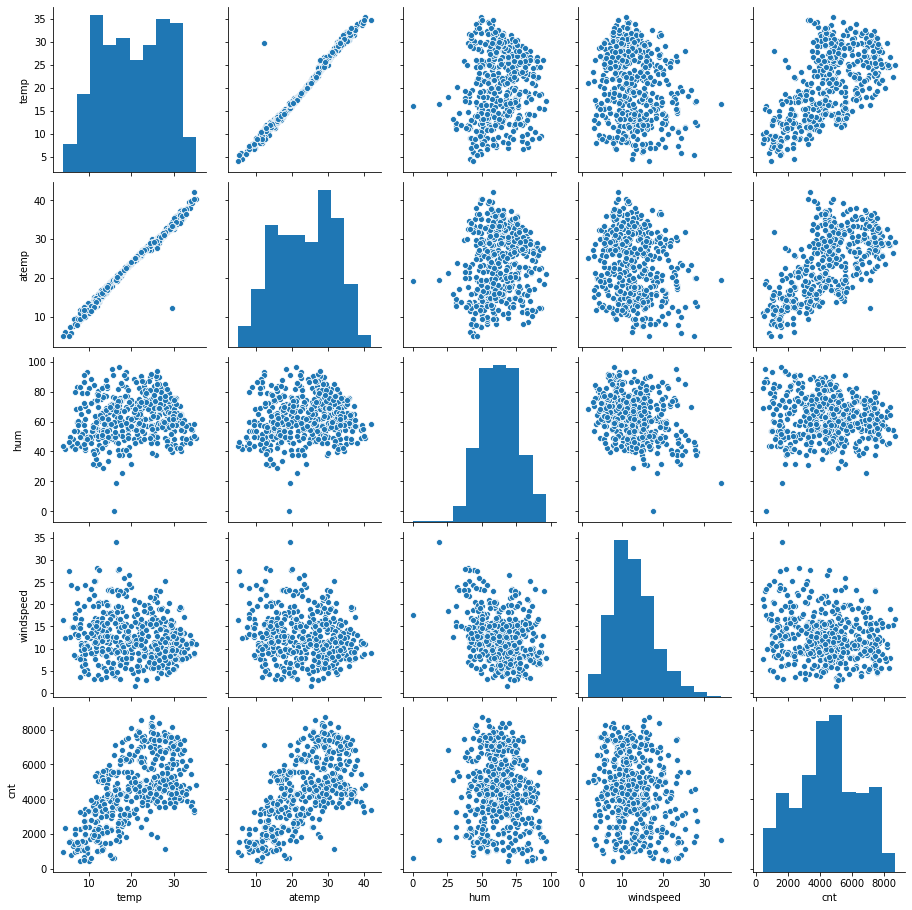

In [22]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df_train[num_vars])
plt.show()

`Inference` : Here we can see there is a very strong positive linear relation between temp and atemp.

Also, there is a linear relation between temp, atemp and cnt

## Visualizing Categorical variables

In [23]:
def plot_bar_box_graph(dimension , description, precision, legend = False, pad = 3.0, size = (12,7), percent = False, rotation = (0,0), fontsize=9, legend_point = (1.0, 1.0)):
    
    target_pivot = pd.pivot_table(data=bike_df, index = dimension, values = 'cnt', aggfunc='sum')
    fig, ax = plt.subplots(1,2)
    fig.tight_layout(pad = pad)
    count_sum  = target_pivot.sum()
    target_pivot = target_pivot.div(count_sum)*100
    plt1 = target_pivot.plot.bar(ax = ax[0], figsize = size)
    plt1.set_xlabel("{}".format(description), fontsize = 12, fontweight = 'bold')
    plt1.set_ylabel('Count', fontsize = 12, fontweight = 'bold')
    plt1.set_title( "{}".format(description),  fontweight = 'bold', fontsize = 12)
    format_annot = ".{}f".format(precision)
    for bar in plt1.patches:
        plt1.annotate(format(bar.get_height(), '.1f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points',
                       rotation = rotation[0],
                       weight = 'bold', fontsize=fontsize)
    if not legend:
        plt1.legend_.remove()
    else:
        plt1.legend(bbox_to_anchor = legend_point)
    sns.boxplot(ax= ax[1], data= bike_df, x = dimension, y = 'cnt')
    plt.title('Box Plot of {} Vs Count'.format(dimension),fontweight = 'bold', fontsize = 12)
    plt.show()

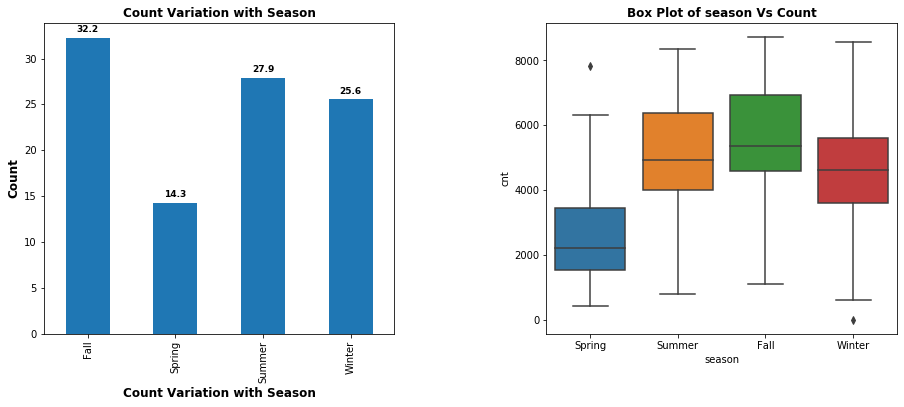

In [24]:
bike_df.season = bike_df.season.map(
{
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
    
}
)
plot_bar_box_graph('season', "Count Variation with Season", 2, percent = True, size = (15,6))

`Inference`: It is obvious that count of bike sharing customers get vary with season. `Fall (Season 3)` shows the highest average of customers `approx. 32%` followed by `Summer and Winter`.

So, Season might be a good feature to analyse count

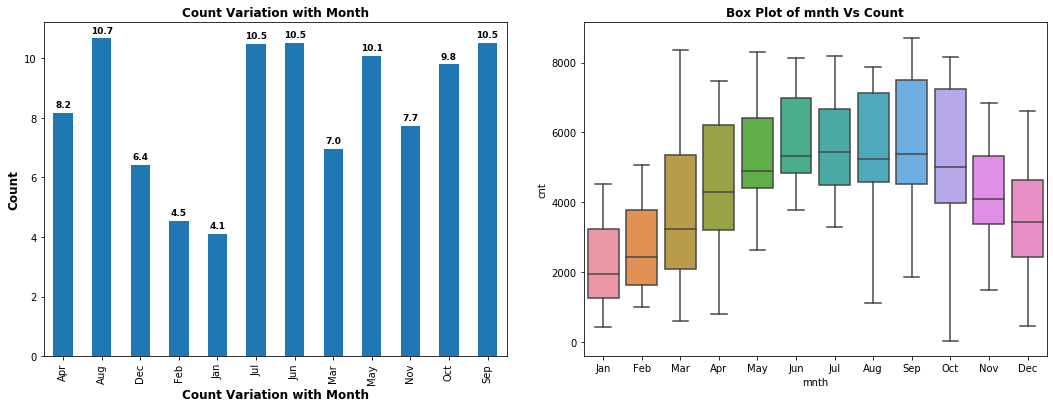

In [25]:
# Ananlysis on Month variable
bike_df.mnth = bike_df.mnth.map(
{
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
)
plot_bar_box_graph('mnth', "Count Variation with Month", 3, pad = 0, percent = True, size = (15,5), legend_point=(1.0, 1.0))

`Inference` : It is seen that the months `May, June, July, August and September` has nearly equal average of bike sharing customers and is of about 10% approx with a median value ranges between 4000 and 6000 

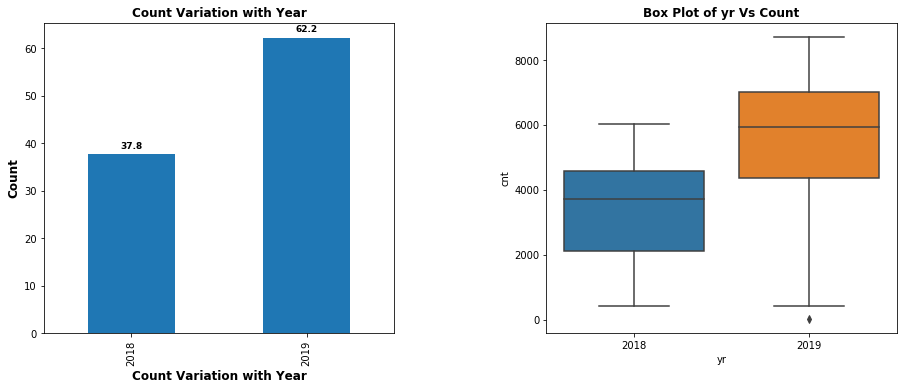

In [26]:
bike_df.yr = bike_df.yr.map(
{
    0:'2018',
    1:'2019'
}
)
plot_bar_box_graph('yr', "Count Variation with Year", 3,percent = True, size = (15,6))

`Inference`: It is clear that there is an increase in average customer count when compared between years 2018 and 2019

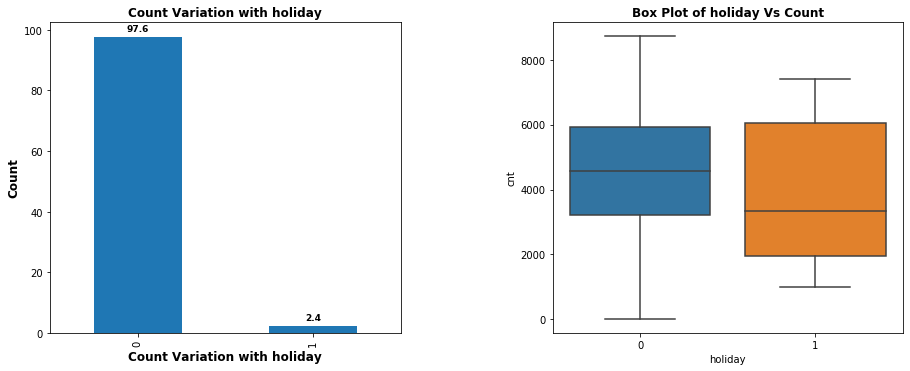

In [27]:
# Analysing Holiday

plot_bar_box_graph('holiday', "Count Variation with holiday", 3,percent = True, size = (15,6))

`Inference` : It is seen that about 97.6% of customers booked for bike sharing if the day is not a holiday. Thus the data has imbalance in it and is biased for one category. So this `might not be a good feature to explain the target` (dependent variable)

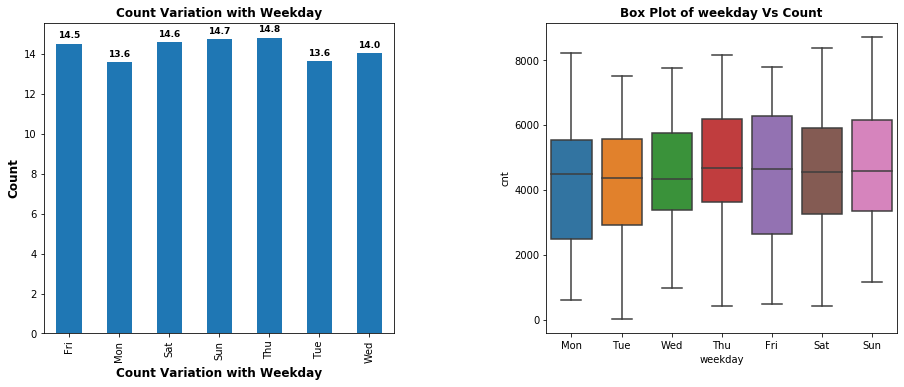

In [28]:
# Analysing Weekday
bike_df.weekday = bike_df.weekday.map(
{
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    0: 'Sun'
}
)
plot_bar_box_graph('weekday', "Count Variation with Weekday", 3,percent = True, size = (15,6))

`Inference`: The varibale weekday shows that the average booking happened in all days falls between 13.6% to 14.8% with median also ranges with 4000 to 5000.

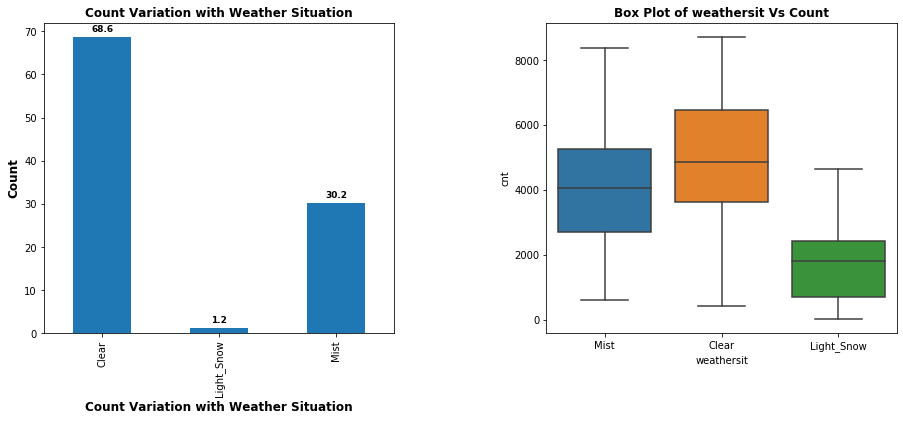

In [29]:
# Analysing Weather Situation
bike_df.weathersit = bike_df.weathersit.map(
{
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Snow',
    4: 'Heavy_Rain'
}
)
plot_bar_box_graph('weathersit', "Count Variation with Weather Situation", 3,percent = True, size = (15,6))

`Inference` : About 69% of bookings happened when the weather situation is of category 1 (`Clear, Few clouds, Partly cloudy, Partly cloudy`) with median of about 5000 booking. 

The second situation of weather (`Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`) has mean booking of about 31% with median count of about 4000 bookings.

So, the target varibale count is influenced by the feature weathersit

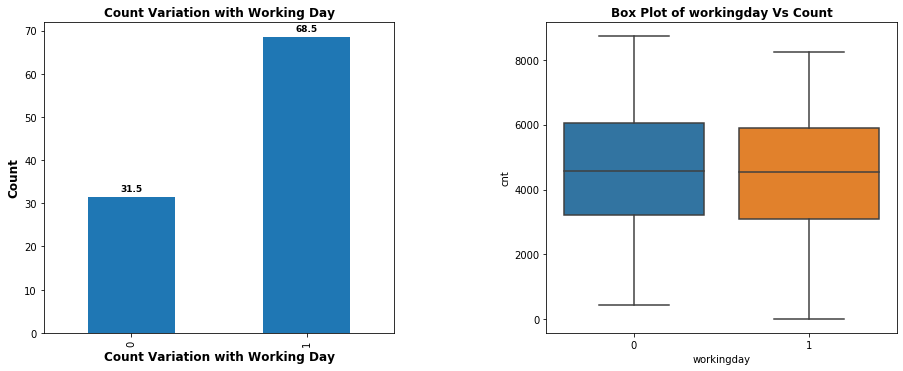

In [30]:
# Analysing Workday

plot_bar_box_graph('workingday', "Count Variation with Working Day", 3,percent = True, size = (15,6))

`Inference` : About 68.5% of bookings happened on working day. This shows an underlying fact that bike sharing is happening the most on working days. So, working customers for their transportation are preferring bike sharing the most

### Visualizing Correlations using heatmap

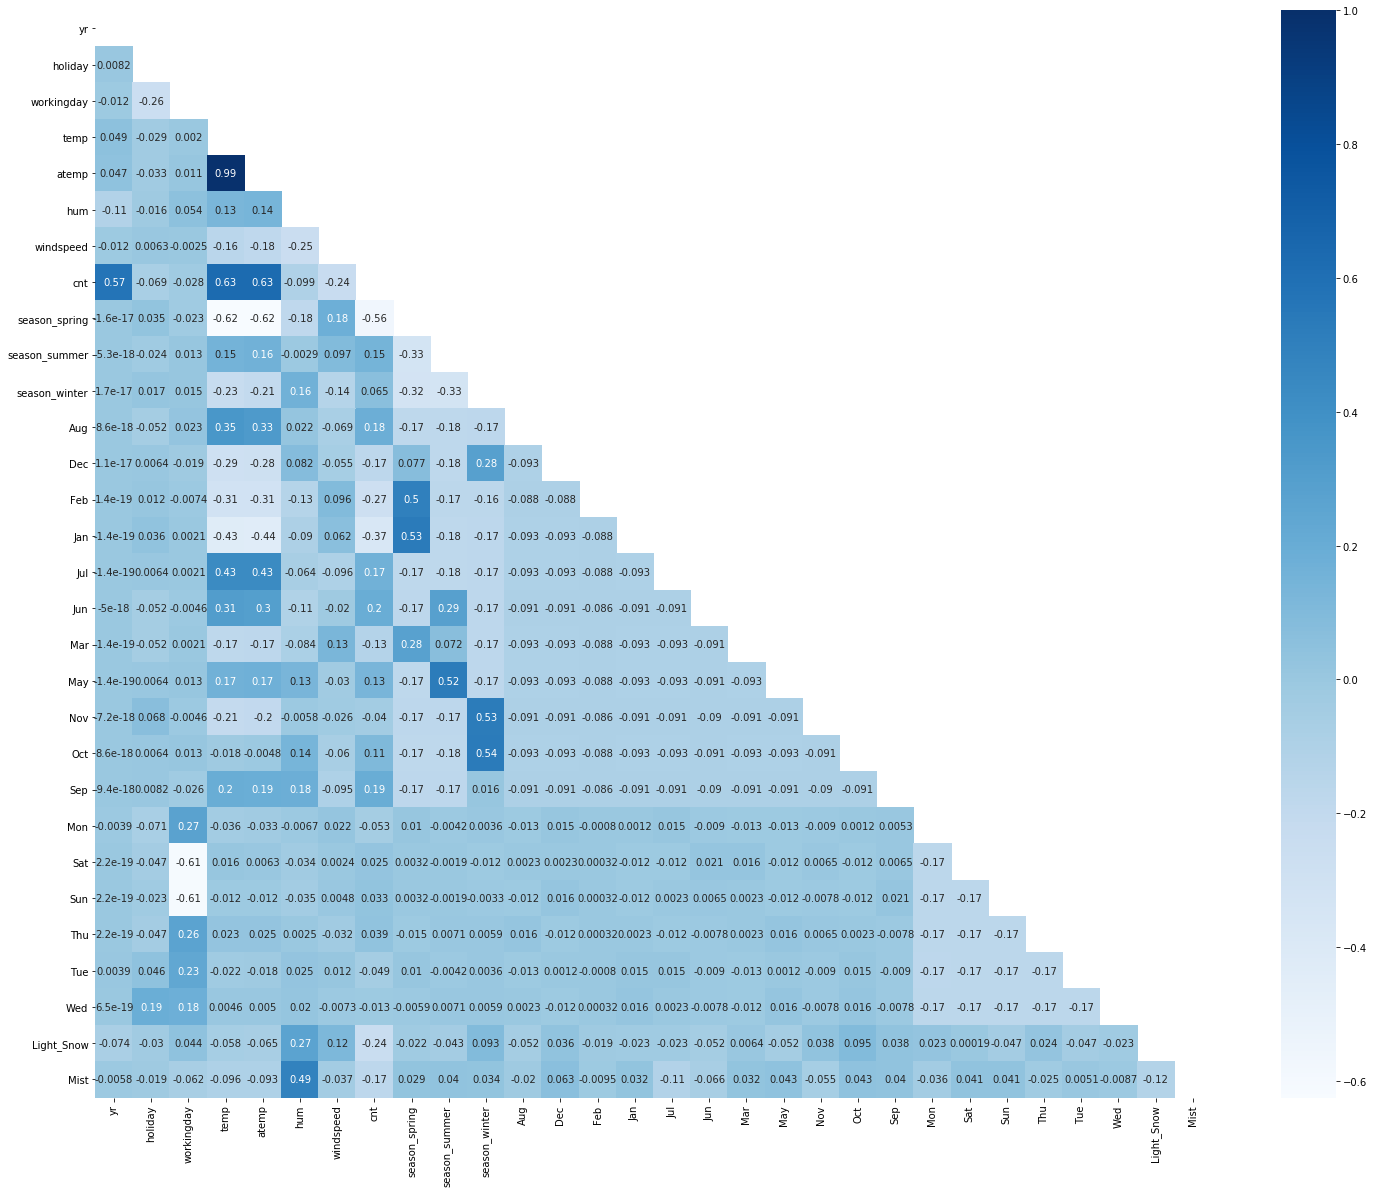

In [31]:
plt.figure(figsize = (25,20))
mask = np.triu(model_df.corr())
sns.heatmap(model_df.corr(), cmap = 'Blues', annot = True, mask = mask)
plt.show()

`Inference`: The heat map shows clearly that some variables like `temp and atemp` are Multicollinear. So, using VIF values,  we can see the multicollinearity relation and drop particular features

# Rescaling the features

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
589,1,0,1,0.815938,0.759261,0.461539,0.234647,0.778945,0,0,...,0,0,0,0,0,0,1,0,0,0
60,0,0,1,0.311677,0.298133,0.337815,0.588452,0.205602,1,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,1,0.591581,0.580597,0.648198,0.266662,0.495956,0,0,...,0,1,0,0,0,0,0,1,0,1
608,1,0,0,0.858414,0.813704,0.581495,0.187179,0.689243,0,0,...,0,1,0,0,1,0,0,0,0,1
51,0,1,0,0.270290,0.249625,0.538461,0.588479,0.081613,1,0,...,0,0,0,0,0,0,0,1,0,1


In [95]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.492157,0.033333,0.700000,0.524287,0.508266,0.565930,0.340925,0.489698,0.256863,0.250980,...,0.090196,0.078431,0.131373,0.133333,0.135294,0.147059,0.145098,0.156863,0.023529,0.350980
std,0.500429,0.179682,0.458708,0.243227,0.223216,0.176650,0.158949,0.232704,0.437332,0.434003,...,0.286744,0.269113,0.338139,0.340268,0.342373,0.354512,0.352545,0.364028,0.151726,0.477745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.309227,0.314865,0.436525,0.229511,0.335989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538214,0.532080,0.561323,0.323711,0.497102,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.731805,0.688654,0.690694,0.429488,0.652753,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [96]:
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

## Selecting Features using RFE (Recursive Feature Elimination)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [97]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 15),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 8),
 ('Sun', False, 14),
 ('Thu', False, 10),
 ('Tue', False, 3),
 ('Wed', False, 12),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Snow',
       'Mist'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'Aug', 'Jun', 'Mar', 'May',
       'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [100]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Checking for VIF values

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Creating VIF Dataframe 

VIF = pd.DataFrame()
VIF['Columns'] = X_train_rfe.columns
VIF['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
3,hum,16.695522
2,temp,13.416864
5,season_spring,5.362897
4,windspeed,4.927806
9,Jan,2.757987
6,season_winter,2.658340
8,Feb,2.467667
14,Mist,2.444962
0,yr,2.009051
11,Nov,1.791004


In [102]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable 
import statsmodels.api as sm  
X_train_m1 = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train,X_train_m1).fit()   # Running the linear model

In [103]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.54e-185
Time:                        12:46:19   Log-Likelihood:                 487.87
No. Observations:                 510   AIC:                            -943.7
Df Residuals:                     494   BIC:                            -876.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3574      0.031     11.460

In [104]:
# Model 2

# Here hum is having high VIF   So, dropping hum

X_train_2 = X_train_rfe.drop('hum', axis = 1)

In [105]:
# Calculating VIF
VIF = pd.DataFrame()
VIF['Columns'] = X_train_2.columns
VIF['VIF'] = [variance_inflation_factor(X_train_2.values, i ) for i in range(X_train_2.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
2,temp,5.075482
4,season_spring,5.009905
3,windspeed,4.918633
8,Jan,2.670000
7,Feb,2.452391
5,season_winter,2.397129
0,yr,1.990071
10,Nov,1.752815
13,Mist,1.548782
6,Dec,1.467936


In [106]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable  
X_train_m2 = sm.add_constant(X_train_2)

lm2 = sm.OLS(y_train,X_train_m2).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.61e-182
Time:                        12:46:27   Log-Likelihood:                 477.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     495   BIC:                            -862.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2868      0.027     10.504

In [107]:
# Model 3

# Dropping Feb based on high p-value
X_train_3 = X_train_2.drop('Feb',axis = 1)

In [108]:
# Calculating VIF
VIF = pd.DataFrame()
VIF['Columns'] = X_train_3.columns
VIF['VIF'] = [variance_inflation_factor(X_train_3.values, i ) for i in range(X_train_3.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
2,temp,5.043750
3,windspeed,4.893007
4,season_spring,2.590945
5,season_winter,2.345592
0,yr,1.989701
9,Nov,1.735617
7,Jan,1.697883
12,Mist,1.547177
8,Jul,1.442942
6,Dec,1.325631


In [109]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable 
 
X_train_m3 = sm.add_constant(X_train_3)

lm3 = sm.OLS(y_train,X_train_m3).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.15e-183
Time:                        12:46:32   Log-Likelihood:                 475.92
No. Observations:                 510   AIC:                            -923.8
Df Residuals:                     496   BIC:                            -864.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2754      0.027     10.286

In [110]:
# Model 4

# Removing Jan variable as it has high p-value

X_train_4 = X_train_3.drop('Jan', axis = 1)

In [111]:
# Calculating VIF
VIF = pd.DataFrame()
VIF['Columns'] = X_train_4.columns
VIF['VIF'] = [variance_inflation_factor(X_train_4.values, i ) for i in range(X_train_4.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
2,temp,4.980511
3,windspeed,4.884829
5,season_winter,2.333424
0,yr,1.988114
4,season_spring,1.953820
8,Nov,1.730883
11,Mist,1.534072
7,Jul,1.437525
6,Dec,1.283433
9,Sep,1.210063


In [112]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable 
 
X_train_m4 = sm.add_constant(X_train_4)

lm4 = sm.OLS(y_train,X_train_m4).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          7.48e-183
Time:                        12:46:35   Log-Likelihood:                 473.25
No. Observations:                 510   AIC:                            -920.5
Df Residuals:                     497   BIC:                            -865.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2599      0.026      9.991

In [113]:
# Model 5

# Removing Dec as it has high p-value

X_train_5 = X_train_4.drop('Dec', axis = 1)

In [114]:
# Calculating VIF
VIF = pd.DataFrame()
VIF['Columns'] = X_train_5.columns
VIF['VIF'] = [variance_inflation_factor(X_train_5.values, i ) for i in range(X_train_5.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
2,temp,4.970765
3,windspeed,4.882175
0,yr,1.987898
5,season_winter,1.956986
4,season_spring,1.915955
7,Nov,1.597100
10,Mist,1.533553
6,Jul,1.436904
8,Sep,1.201768
9,Light_Snow,1.078711


In [115]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable 
 
X_train_m5 = sm.add_constant(X_train_5)

lm5 = sm.OLS(y_train,X_train_m5).fit()   # Running the linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.15e-182
Time:                        12:46:40   Log-Likelihood:                 470.00
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     498   BIC:                            -865.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2464      0.026      9.628

In [116]:
# Model 6

# Removing holiday as it has high p-value

X_train_6 = X_train_5.drop('holiday', axis = 1)

In [117]:
VIF = pd.DataFrame()
VIF['Columns'] = X_train_6.columns
VIF['VIF'] = [variance_inflation_factor(X_train_6.values, i ) for i in range(X_train_6.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
1,temp,4.966217
2,windspeed,4.882095
0,yr,1.985224
4,season_winter,1.955592
3,season_spring,1.898698
6,Nov,1.595544
9,Mist,1.533133
5,Jul,1.435404
7,Sep,1.201702
8,Light_Snow,1.077731


In [118]:
## Building model using statsmodel for detailed Statistics

# Adding a constant variable 
 
X_train_m6 = sm.add_constant(X_train_6)

lm6 = sm.OLS(y_train,X_train_m6).fit()   # Running the linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.59e-182
Time:                        12:46:43   Log-Likelihood:                 465.75
No. Observations:                 510   AIC:                            -909.5
Df Residuals:                     499   BIC:                            -862.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2447      0.026      9.491

In [124]:
lm6.params

const            0.244680
yr               0.243202
temp             0.422845
windspeed       -0.103704
season_spring   -0.145628
season_winter    0.070654
Jul             -0.066571
Nov             -0.064868
Sep              0.050507
Light_Snow      -0.268401
Mist            -0.076781
dtype: float64

`cnt = ( 0.281201 * const ) + ( 0.243202 * yr ) + ( 0.422845 * temp ) - ( 0.103704 * windspeed ) - ( 0.145628 * season_spring ) + (0.070654 * season_winter ) - ( 0.066571 * Jul ) - ( 0.064868 * Nov ) + ( 0.050507 * Sep ) - ( 0.268401 * Light_Snow ) - ( 0.076781 * Mist )`

## Parameter Coefficient Explanation

- Const : 
   - Co-eff is 0.281201. 
   - This indicates that even if all the remaining feature has no contribution to the target variable, it will still increase by 0.281201.

- yr :
   - Co-eff is 0.243202.
   - If we change the year from 0 to 1 i.e, 2018 to 2019, then the cnt of bike sharing customers will increase by 0.243202.
   
- temp :
   - Co-eff is 0.422845
   - This is the variable that influence the cnt variable the most. So, if there is a unit increase in temp (with all remaing features remains constant) then the cnt will increase by 0.422845 times.
   
- windspeed : 
   - Co-eff is - 0.103704.
   - This has negative correlation with cnt, So, if windspeed increases cnt variable decreases.
   
- Season_Spring : 
   - Co-eff is - 0.145628.
   - This season has negative impact over cnt variable. This indicates with all feature remains constant and if there is unit increase in season_spring, the number of bike sharing will decrease by 0.145628 units

- Season_Winter:
   - Co_eff is 0.070654.
   - This indicates if the season_winter increases by one unit with all other remains consatnt, there will be an increase of 0.070654 units in number of bike sharing.
   
- Jul:
   - Co-eff is -0.066571.
   - Thus unit increase in Jul will make cnt variable decrease by 0.066571 units.
- Nov:
   - Co-eff is -0.064868.
   - Thus unit increase in Jul will make cnt variable decrease by 0.064868 units.
- Sep:
   - Co-eff is 0.050507.
   - Thus unit increase in Jul will make cnt variable increase by 0.050507 units.
   
- Light_Snow:
   - Co-eff is - 0.268401.
   - Thus unit increase in Light Snow will decrease the cnt by 0.268401 units.
- Mist:
   - Co-eff is - 0.076781.
   - Thus unit increase in Light Snow will decrease the cnt by 0.076781 units.

## Model Validation

   - Here the model is validated for below factors:
      - Homoscedasticity
      - Absence of Multicollinearity
      - Independnece of Residuals
      - Normal Distribution of Error terms

### Homoscedasticity

         - Homoscedasticity refers that there is no increase or decrease in variance of error terms. Variance of Error terms is constant

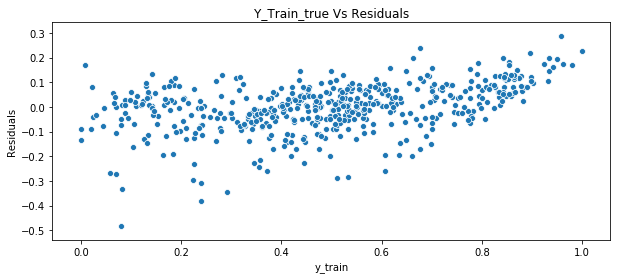

In [128]:
y_train_pred = lm6.predict(X_train_m6)
residuals = y_train - y_train_pred
plt.figure(figsize = (10,4))
sns.scatterplot(x=y_train, y = residuals)
plt.xlabel('y_train')
plt.ylabel('Residuals')
plt.title("Y_Train_true Vs Residuals")
plt.show()

`Inference`: This graph shows that the variance is almost constant. Hence proving Homoscedasticity

### Absence of Multicollinearity

In [340]:
## Using VIF for Feature terms

VIF = pd.DataFrame()
VIF['Columns'] = X_train_6.columns
VIF['VIF'] = [variance_inflation_factor(X_train_6.values, i ) for i in range(X_train_6.shape[1])]
VIF.sort_values(by='VIF', ascending = False)

,Columns,VIF
1,temp,4.953425
2,windspeed,4.864007
0,yr,1.967625
3,season_spring,1.825732
9,Mist,1.540875
4,season_winter,1.416903
5,Jul,1.360805
6,Mar,1.198922
7,Sep,1.183946
8,Light_Snow,1.092884


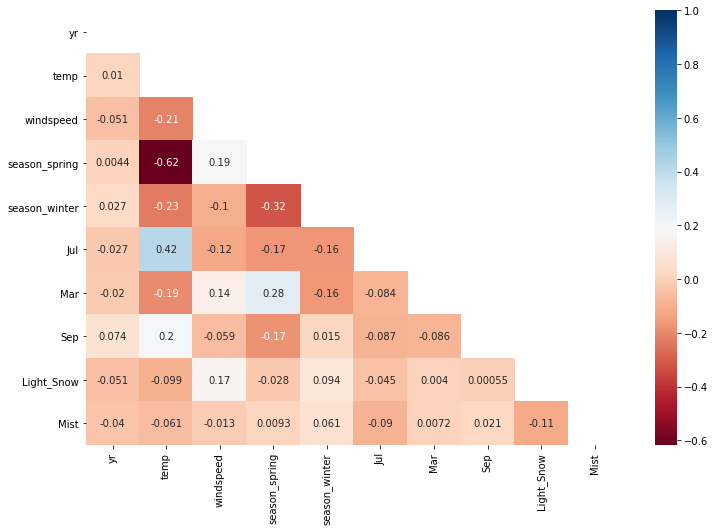

In [341]:
## Using Correlation heatmap

plt.figure(figsize= (12,8))
mask = np.triu(X_train_6.corr())
sns.heatmap(X_train_6.corr(), cmap = 'RdBu', annot = True, mask = mask)
plt.show()

`Inference`: Here the VIF value for all the feature lies below 5. Also, it is vident from the heatmap that there is no strong linear correlation between any of the features

### Normal Distribution of Error terms

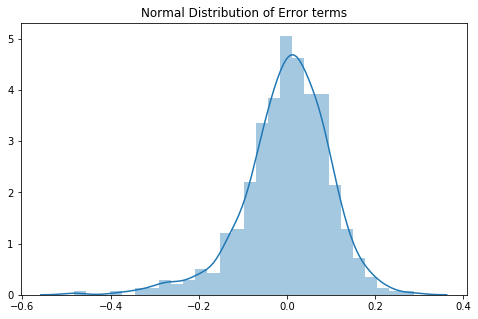

In [129]:
plt.figure(figsize = (8,5))
sns.distplot(residuals)
plt.title('Normal Distribution of Error terms')
plt.show()

`Inference`: It is evident here that all the error terms follows normal distribution and has a mean value centered around 0

# Prediction using model

In [130]:
# Scaling test dataset

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [131]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.518182,0.018182,0.668182,0.515242,0.501671,0.575503,0.359650,0.498045,0.222727,0.254545,...,0.072727,0.090909,0.172727,0.163636,0.159091,0.131818,0.140909,0.109091,0.040909,0.304545
std,0.500809,0.133913,0.471940,0.230320,0.211642,0.192021,0.161600,0.236533,0.417026,0.436599,...,0.260281,0.288135,0.378873,0.370789,0.366595,0.339064,0.348721,0.312464,0.198531,0.461264
min,0.000000,0.000000,0.000000,-0.048868,-0.026641,0.113501,0.074379,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.322296,0.335987,0.419042,0.240707,0.301612,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.511531,0.508688,0.580689,0.334628,0.496137,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727720,0.684608,0.708849,0.455459,0.689484,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.956434,0.980426,1.012910,0.864144,0.928287,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
X_test_final = X_test[X_train_6.columns]
X_test_final_sm = sm.add_constant(X_test_final)
X_test_final_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 82 to 726
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   temp           220 non-null    float64
 3   windspeed      220 non-null    float64
 4   season_spring  220 non-null    uint8  
 5   season_winter  220 non-null    uint8  
 6   Jul            220 non-null    uint8  
 7   Nov            220 non-null    uint8  
 8   Sep            220 non-null    uint8  
 9   Light_Snow     220 non-null    uint8  
 10  Mist           220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [134]:
y_test_pred = lm6.predict(X_test_final_sm)

# Evaluating model performance by calculating R-squared score

In [135]:
from sklearn.metrics import r2_score

In [136]:
r2 = round(r2_score(y_pred= y_test_pred, y_true= y_test),5)
r2

0.8178

`Inference`: The r2 score of train set is 82.6% and that of test set is about 81.78% 
This indicates that the model has no overfitting in it and able to explain the test data set

# Model Outcome

In [137]:
feature_coeff = lm6.params.reset_index().rename(columns = {0:'coeff_'})
feature_coeff

,index,coeff_
0,const,0.244680
1,yr,0.243202
2,temp,0.422845
3,windspeed,-0.103704
4,season_spring,-0.145628
5,season_winter,0.070654
6,Jul,-0.066571
7,Nov,-0.064868
8,Sep,0.050507
9,Light_Snow,-0.268401


# TOP CONTRIBUTING FEATURES

- Temperature
- Light Snow (Weather Situation 3)
- year
- Season Spring (Season 1)
- Windspeed